In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [358]:
df = pd.read_csv('SearchResults.csv')

In [359]:
df.head(3)

,Rank,NCT Number,Title,Acronym,Recruitment,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Completion Date,Last Verified,First Submitted,First Posted,Results First Submitted,Results First Posted,Last Update Submitted,Last Update Posted,Locations,URL
0,1,NCT03004313,Structural and Molecular Neuroplasticity in Mi...,null,Completed,No Results Available,Migraine,Procedure: Pet Scan|Procedure: MRI scan|Proced...,Level of mu-opioid receptor binding potential ...,University of Michigan,...,October 2014,November 2017,"August 30, 2011","December 28, 2016",null,null,"November 21, 2017","November 24, 2017",University of Michigan - Michigan Center for O...,https://ClinicalTrials.gov/show/NCT03004313
1,2,NCT00777218,Cognitive Side Effects of Commonly Prescribed ...,null,Unknown status,No Results Available,Migraine,Drug: propranolol|Drug: zonisamide|Drug: topir...,"Record if memory, repetition or recall was imp...",University of South Alabama,...,July 2011,June 2010,"October 21, 2008","October 22, 2008",null,null,"June 23, 2010","June 24, 2010",University of South Alabama Department of Neur...,https://ClinicalTrials.gov/show/NCT00777218
2,3,NCT01699009,A Nutritional Intervention for Migraines-2,WCCR-MIG2,Completed,No Results Available,Migraines,Other: Plant based diet|Other: an unrestricted...,Migraines Pain Change in Migraines frequency|C...,Physicians Committee for Responsible Medicine,...,May 2014,May 2014,"October 1, 2012","October 3, 2012",null,null,"October 19, 2015","October 20, 2015","Physicians Committee for Responsible Medicine,...",https://ClinicalTrials.gov/show/NCT01699009


In [360]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Recruitment',
       'Study Results', 'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Last Verified',
       'First Submitted', 'First Posted', 'Results First Submitted',
       'Results First Posted', 'Last Update Submitted', 'Last Update Posted',
       'Locations', 'URL'],
      dtype='object')

In [361]:
df.columns = ['Rank', 'NCT Number', 'Title', 'Acronym', 'Recruitment',
       'Study Results', 'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor_Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Last Verified',
       'First Submitted', 'First Posted', 'Results First Submitted',
       'Results First Posted', 'Last Update Submitted', 'Last Update Posted',
       'Locations', 'URL']

In [362]:
df.Phases.unique()

array([nan, 'Phase 4', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 2|Phase 3',
       'Phase 1|Phase 2', 'Early Phase 1'], dtype=object)

In [363]:
df.Phases.fillna('NA', inplace=True)

In [364]:
df.Phases.unique()

array(['NA', 'Phase 4', 'Phase 1', 'Phase 2', 'Phase 3', 'Phase 2|Phase 3',
       'Phase 1|Phase 2', 'Early Phase 1'], dtype=object)

In [365]:
phases = df.Phases.value_counts()
df.Phases.value_counts()

NA                 131
Phase 3             81
Phase 4             61
Phase 2             55
Phase 1             28
Phase 2|Phase 3     14
Phase 1|Phase 2      8
Early Phase 1        1
Name: Phases, dtype: int64

(-11.233270814556338,
 11.011108136059081,
 -11.119502129951613,
 11.098681620350749)

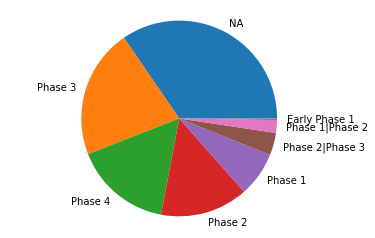

In [527]:
fig, ax = plt.subplots()
ax.pie(phases, labels = phases.index, startangle=0, radius = 10)
ax.axis('equal')

In [367]:
df.Sponsor_Collaborators.value_counts()

GlaxoSmithKline                                                                                                                                             14
Allergan                                                                                                                                                    12
Thomas Jefferson University                                                                                                                                 12
Eli Lilly and Company                                                                                                                                       11
Amgen                                                                                                                                                       10
Montefiore Medical Center                                                                                                                                   10
Dr. Reddy's Laboratories Limited              

In [371]:
sorted(df.Sponsor_Collaborators.unique())

['ASIS Corporation',
 'Abbott',
 'Achelios Therapeutics',
 'Acorda Therapeutics',
 "Akron Children's Hospital",
 'Albert Einstein College of Medicine, Inc.',
 'Albert Einstein Healthcare Network',
 'Alder Biopharmaceuticals, Inc.',
 'Alexza Pharmaceuticals, Inc.',
 'Alexza Pharmaceuticals, Inc.|PPD',
 'Allergan',
 'Allergan|MAP Pharmaceuticals, Inc., a wholly owned subsidiary of Allergan',
 'Allodynic Therapeutics, LLC',
 'Amgen',
 'Amy Gelfand|University of California, Los Angeles|University of California, San Francisco',
 'Anne Lindblad|National Institute of Neurological Disorders and Stroke (NINDS)|Ortho-McNeil Janssen Scientific Affairs, LLC|The EMMES Corporation',
 'AstraZeneca',
 'Avanir Pharmaceuticals',
 'Behar, Caren, M.D.',
 'Benjamin Natelson|Beth Israel Medical Center',
 'Beth Israel Deaconess Medical Center',
 'BioElectronics Corporation',
 'Biohaven Pharmaceutical Holding Company Ltd.',
 'Boston Scientific Corporation',
 'Bradley Katz|University of Utah',
 "Brigham and Wo

In [372]:
df1 = df.head(10)

df_expanded = df.head(10)
def expandSponsors(df_expanded):
    # If there are multiple sponsors split by '|', add rows such that each sponsor gets individual row
    #  and delete original row
    
    drop_index = []

    for i, row in df_expanded.iterrows():
        index_count = len(df_expanded.index)
        lst=[]
        lst = row.Sponsor_Collaborators.split('|')
        raw_count = len(lst)
        if raw_count > 1:
            df_expanded = df_expanded.append(pd.DataFrame([row]*raw_count), ignore_index = True)
    #        print(len(df_test1.index))
            for lst_index, lst_value in enumerate(lst):
    #            print(lst_value, index_count + lst_index)
                df_expanded.iloc[index_count + lst_index, 9] = lst_value
            drop_index.append(i)
    df_dropped = df_expanded.drop(drop_index, axis=0)
    df_dropped_index_reset = df_dropped.reset_index(drop=True)
    return df_dropped_index_reset


In [373]:
df1 = expandSponsors(df)

In [374]:
df1.shape

(565, 30)

In [380]:
df1.Sponsor_Collaborators.value_counts().head(10)

GlaxoSmithKline                     28
Allergan                            19
Thomas Jefferson University         18
Teva Pharmaceutical Industries      13
Montefiore Medical Center           12
Eli Lilly and Company               12
Amgen                               10
Cady, Roger, M.D.                    9
Merck Sharp & Dohme Corp.            9
Dr. Reddy's Laboratories Limited     8
Name: Sponsor_Collaborators, dtype: int64

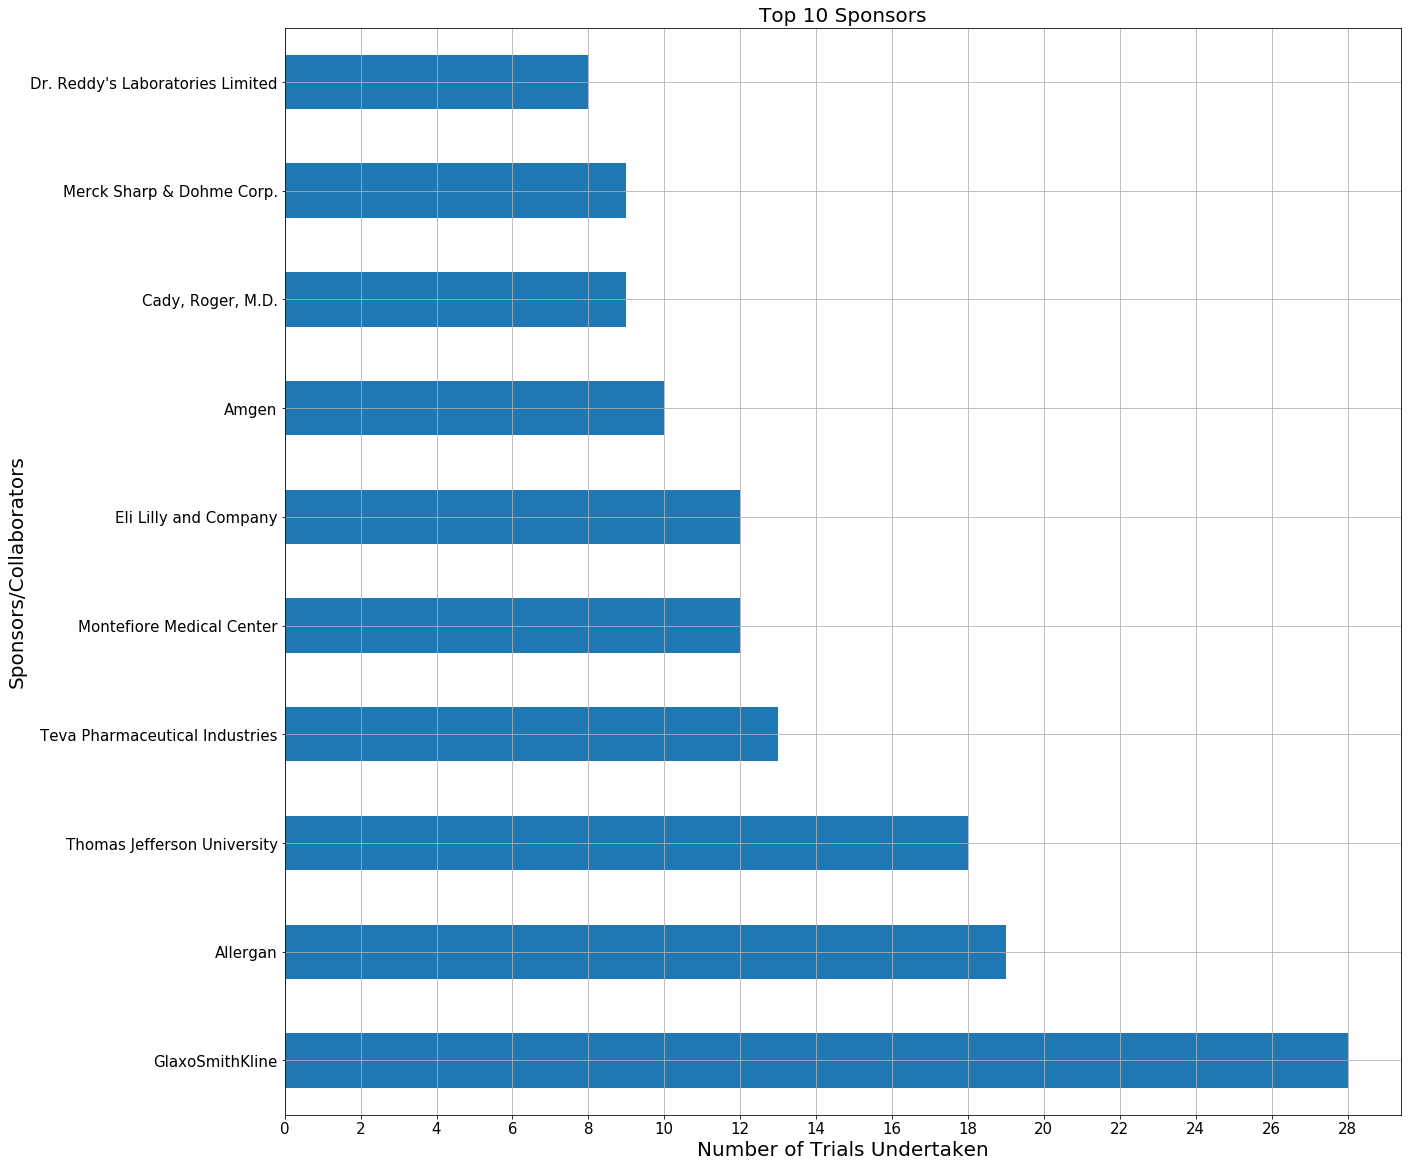

In [416]:
Top10Sponsors = df1.Sponsor_Collaborators.value_counts().head(10)
Top10Sponsors.plot(kind='barh', figsize=(20,20), fontsize=15, xticks = range(0,30,2), grid=True)
plt.title('Top 10 Sponsors', fontsize=20)
plt.xlabel('Number of Trials Undertaken', fontsize=20)
plt.ylabel('Sponsors/Collaborators', fontsize=20)

In [427]:
df_table = df1[df1.Sponsor_Collaborators.isin(Top10Sponsors.index)]


In [478]:
df_table1 = df_table[['NCT Number', 'Title', 'Recruitment', 'Phases', 'Enrollment', 'Sponsor_Collaborators']]
df_table2 = df_table1.sort_values(['Sponsor_Collaborators', 'Phases'], axis=0)

In [504]:
Table1 = df_table2.groupby(['Sponsor_Collaborators']).Phases.value_counts().sort_index(level=[0,1])

In [508]:
Table1

Sponsor_Collaborators             Phases         
Allergan                          NA                  5
                                  Phase 2|Phase 3     1
                                  Phase 3             7
                                  Phase 4             6
Amgen                             Phase 1             4
                                  Phase 2             4
                                  Phase 3             2
Cady, Roger, M.D.                 Phase 2             1
                                  Phase 4             8
Dr. Reddy's Laboratories Limited  Phase 1             1
                                  Phase 2             3
                                  Phase 3             4
Eli Lilly and Company             Early Phase 1       1
                                  NA                  1
                                  Phase 1             2
                                  Phase 2             4
                                  Phase 3             

In [525]:
CondFormat = df1[pd.to_numeric(df1.Enrollment, errors='coerce') > 1000][['Title', 'Phases', 'Sponsor_Collaborators']]
CondFormat.sort_values('Sponsor_Collaborators')

,Title,Phases,Sponsor_Collaborators
188,Evaluation of ALD403 (Eptinezumab) in the Prev...,Phase 3,"Alder Biopharmaceuticals, Inc."
204,"Efficacy, Safety, and Tolerability of Oral Ubr...",Phase 3,Allergan
205,"Efficacy, Safety, and Tolerability Study of Or...",Phase 3,Allergan
206,An Extension Study to Evaluate the Long-Term S...,Phase 3,Allergan
194,Zomig - Treatment of Acute Migraine Headache i...,Phase 4,AstraZeneca
223,Safety and Efficacy in Adult Subjects With Acu...,Phase 3,Biohaven Pharmaceutical Holding Company Ltd.
153,Open Label Safety Study in Acute Treatment of ...,Phase 2|Phase 3,Biohaven Pharmaceutical Holding Company Ltd.
222,Safety and Efficacy Study in Adult Subjects Wi...,Phase 3,Biohaven Pharmaceutical Holding Company Ltd.
189,Lasmiditan Compared to Placebo in the Acute Tr...,Phase 3,CoLucid Pharmaceuticals
191,"Three Doses of Lasmiditan (50 mg, 100 mg and 2...",Phase 3,CoLucid Pharmaceuticals
